# Final Report - Data Science
## Bachelor's Degree in Computer Science / PUCPR
**Prof. Rayson Laroca**

`Júlia Cristina Moreira da Silva` - `s.moreira4@pucpr.edu.br`

`Guilherme Schwarz` - `guilherme.schwarz@pucpr.edu.br`

`Renan Belem Biavati` - `renan.belem@pucpr.edu.br`

`Matheus Francisco Trevisan Del Zotto` - `Matheus.del@pucpr.edu.br`


`2025`

# Import the libs you need

In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.dates as mdates


# Load your data

Below, load the data using pandas and perform all necessary data cleansing to ensure that the data types are correct for further analysis.

In [ ]:
dataset_url = 'https://github.com/juliamoreira/data-science/raw/main/startupSuccessPrediction/startup%20data.csv'
df = pd.read_csv(dataset_url)
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
# clean and treat the data here

df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [ ]:
df.shape

(923, 49)

In [ ]:
#counting null values in each column
df.isna().sum()


,0
Unnamed: 0,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
Unnamed: 6,493
name,0
labels,0


In [ ]:

#taking off unused columns
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)

df.head()



,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
#Feature engineering: creating a new column to make a particular category to technology startups
category_codes = df['category_code'].dropna().unique()

tech_categories = [ 'biotech','web', 'software', 'games_video', 'network_hosting', 'mobile', 'security', 'hardware', 'analytics', 'search', 'semiconductor', 'social', 'messaging']
df['is_technology'] = df['category_code'].apply(lambda x: 1 if x in tech_categories else 0)

# and another one to set the age it closed
df['age_at_closing'] = (df['closed_at'] - df['founded_at']).dt.days / 365.25


# Statistical Description

In this section, you should report the key characteristics of the dataset, including but not limited to:
* Number of instances;
* Number of features;
* Number of classes;
* Class distribution.

In [ ]:
instances_number = df.shape[0]
features_number = df.shape[1]
classes_number = df['status'].nunique()

print(f"Number of instances: {instances_number}")
print(f"Number of features: {features_number}")
print(f"Number of classes: {classes_number}")

Number of instances: 923
Number of features: 48
Number of classes: 2


<ipython-input-68-fbe368540a81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='status', palette='pink')


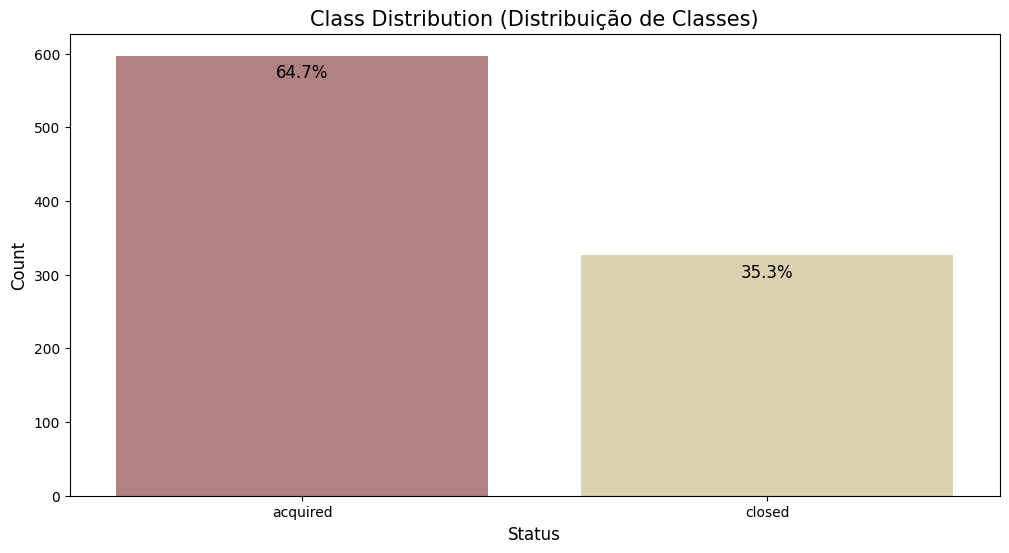

In [ ]:
# Plot a graph bar showing the class distribuition
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='status', palette='pink')
for p in ax.patches:
    height = p.get_height()
    percentage = (height / instances_number) * 100
    ax.text(p.get_x() + p.get_width() / 2, height -30, f'{percentage:.1f}%', ha='center', fontsize=12)

# Título e rótulos
plt.title('Class Distribution (Distribuição de Classes)', fontsize=15)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Exibir o gráfico
plt.show()

# Univariate data analysis

In this section, you should perform univariate data analysis on at least **20 variables**.

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (Gaussian, binomial, exponential, etc.);
2. Skewness;
3. Kurtosis;
4. Mean, standard deviation, and what they stand for in the context of the dataset.

Ensure that each variable is **plotted correctly** based on its type. For instance, make sure scatterplots are not used for categorical data and so forth.

## Defining each function that is required

In [ ]:

def interpret_skewness(skew):
    if skew > 1:
        return "Highly skewed to the right"
    elif skew < -1:
        return "Highly skewed to the left"
    else:
        return "Approximately symmetric"


def interpret_kurtosis(kurt_value):
    if kurt_value > 3:
        return "Leptokurtic (heavy tails)"
    elif kurt_value < 3:
        return "Platykurtic (light tails)"
    else:
        return "Mesokurtic (normal distribution)"


def analyze_numerical(column_name):
    print(f"Analysis for Numerical Column: {column_name}")

    # Plotting histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column_name], kde=True, color='#1f77b4', bins=30)
    plt.title(f"Distribution of {column_name}", fontsize=15)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

    # Calculating statistical measures
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    skewness_value = skew(df[column_name].dropna())
    kurtosis_value = kurtosis(df[column_name].dropna())

    print(f"Statistics for {column_name}:")
    print(f"Mean: {mean}, Standard Deviation: {std_dev}")
    print(f"Skewness: {skewness_value}, Kurtosis: {kurtosis_value}")
    print(f"Interpretation:\n- Skewness: {interpret_skewness(skewness_value)}\n- Kurtosis: {interpret_kurtosis(kurtosis_value)}\n")

def analyze_date(column_name):
    print(f"Analysis for Date Column: {column_name}")

    df[column_name] = pd.to_datetime(df[column_name], errors='coerce')

    # Plottin using year
    df[column_name].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color=sns.color_palette("pastel", n_colors=3))
    plt.title(f"Distribution of {column_name} by Year", fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

    print(f"Frequency Distribution of {column_name} by Year:\n{df[column_name].dt.year.value_counts().sort_index()}\n")


def analyze_categorical(column_name):
    print(f"Analysis for Categorical Column: {column_name}")

    #Plotting
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column_name,  palette='pastel', hue=column_name, order=df[column_name].value_counts().index)
    plt.title(f"Distribution of {column_name}", fontsize=15)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    print(f"Frequency Distribution of {column_name}:\n{df[column_name].value_counts(normalize=True)}\n")




## Choosen columns and its analysis

In [ ]:
categorical_columns= ['is_otherstate', 'is_technology', 'category_code', 'has_VC', 'has_angel', 'has_roundD', 'has_roundC', 'status', 'is_top500', 'state_code', 'is_CA', 'is_NY',  'is_MA',  'is_TX'] # 11 vars
date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at'] # 4 vars
numerical_columns = [ 'age_at_closing','age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year',
                    'relationships', 'funding_rounds', 'funding_total_usd', 'milestones'] # 8 vars

### Categorical Columns Analysys

Analysis for Categorical Column: is_otherstate


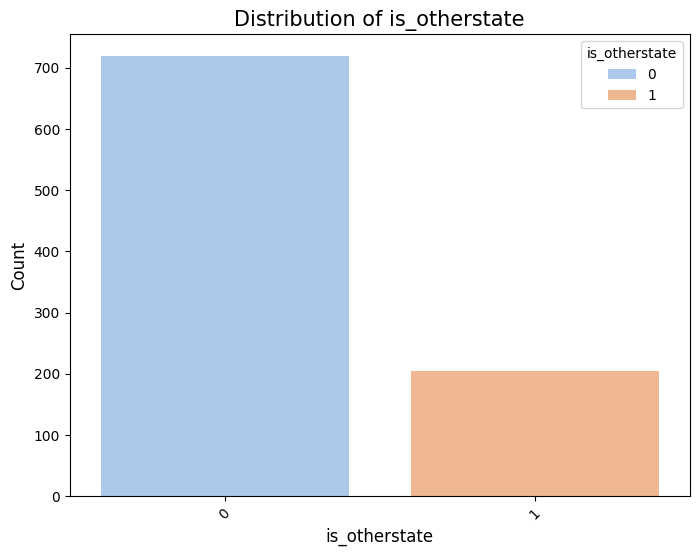

Frequency Distribution of is_otherstate:
is_otherstate
0    0.778982
1    0.221018
Name: proportion, dtype: float64

Analysis for Categorical Column: is_technology


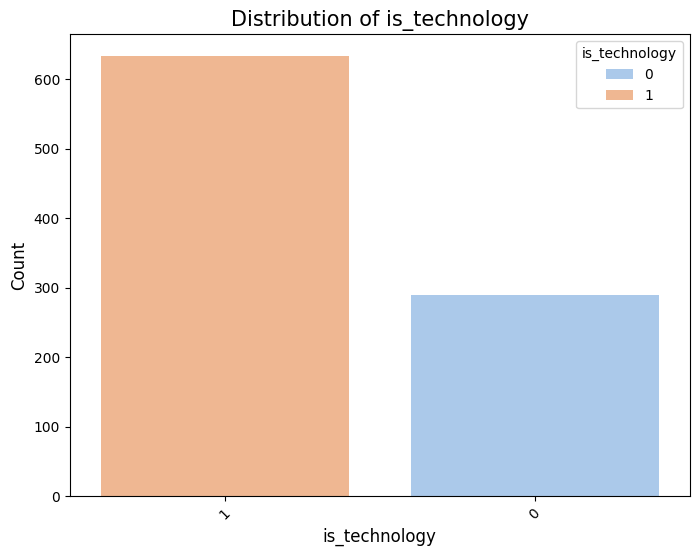

Frequency Distribution of is_technology:
is_technology
1    0.685807
0    0.314193
Name: proportion, dtype: float64

Analysis for Categorical Column: category_code


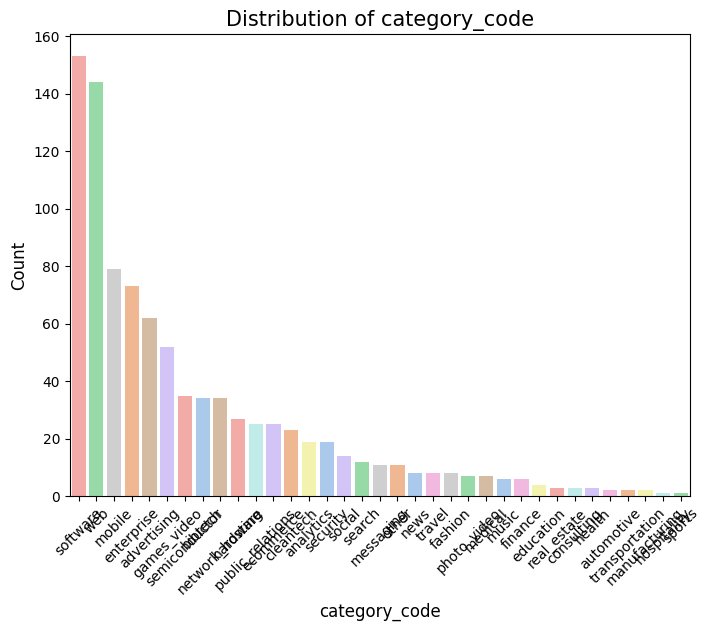

Frequency Distribution of category_code:
category_code
software            0.165764
web                 0.156013
mobile              0.085590
enterprise          0.079090
advertising         0.067172
games_video         0.056338
semiconductor       0.037920
biotech             0.036836
network_hosting     0.036836
hardware            0.029252
public_relations    0.027086
ecommerce           0.027086
cleantech           0.024919
analytics           0.020585
security            0.020585
social              0.015168
search              0.013001
messaging           0.011918
other               0.011918
news                0.008667
travel              0.008667
fashion             0.008667
photo_video         0.007584
medical             0.007584
music               0.006501
finance             0.006501
education           0.004334
real_estate         0.003250
consulting          0.003250
health              0.003250
automotive          0.002167
transportation      0.002167
manufacturing    

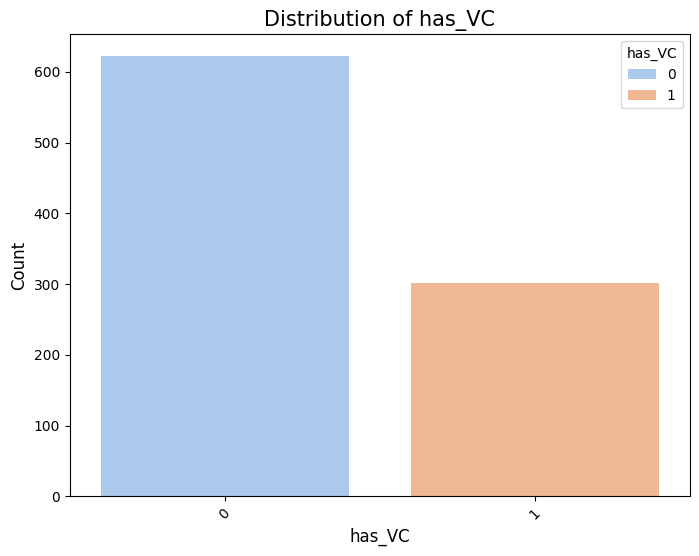

Frequency Distribution of has_VC:
has_VC
0    0.673889
1    0.326111
Name: proportion, dtype: float64

Analysis for Categorical Column: has_angel


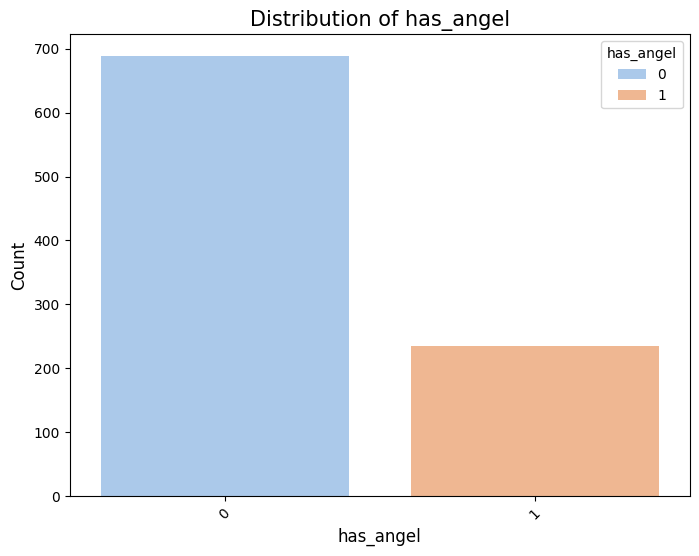

Frequency Distribution of has_angel:
has_angel
0    0.745395
1    0.254605
Name: proportion, dtype: float64

Analysis for Categorical Column: has_roundD


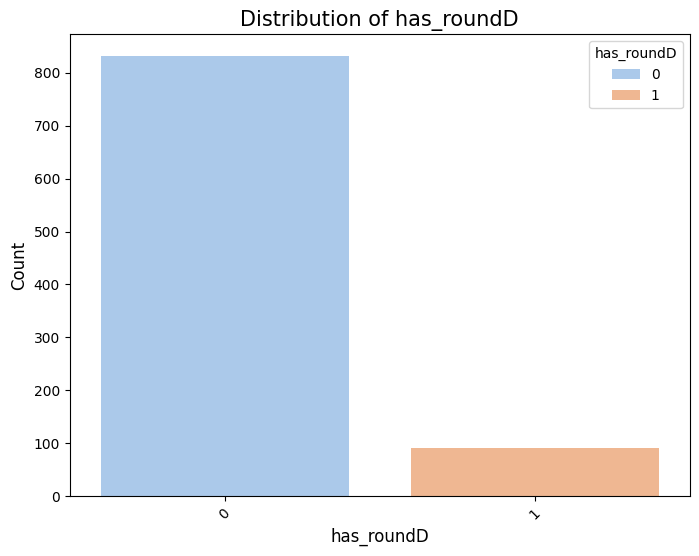

Frequency Distribution of has_roundD:
has_roundD
0    0.900325
1    0.099675
Name: proportion, dtype: float64

Analysis for Categorical Column: has_roundC


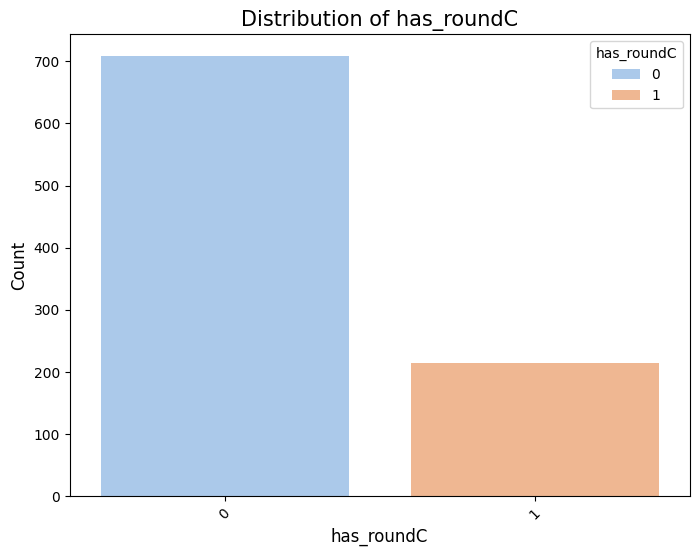

Frequency Distribution of has_roundC:
has_roundC
0    0.767064
1    0.232936
Name: proportion, dtype: float64

Analysis for Categorical Column: status


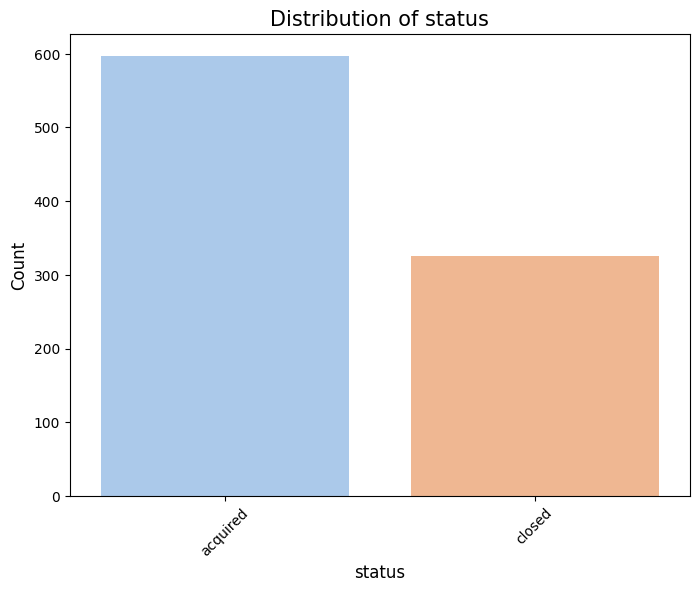

Frequency Distribution of status:
status
acquired    0.646804
closed      0.353196
Name: proportion, dtype: float64

Analysis for Categorical Column: is_top500


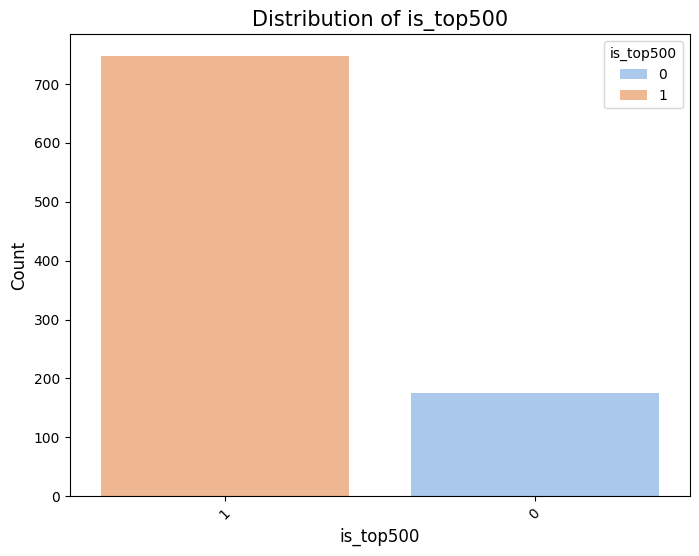

Frequency Distribution of is_top500:
is_top500
1    0.809317
0    0.190683
Name: proportion, dtype: float64

Analysis for Categorical Column: state_code


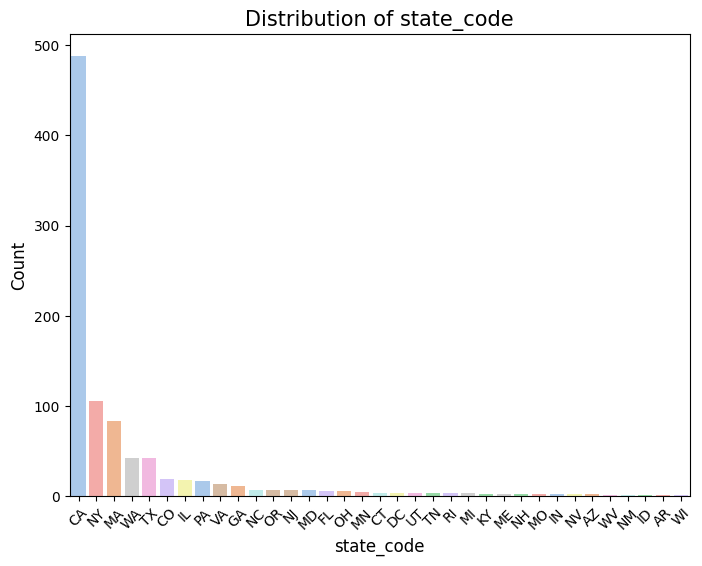

Frequency Distribution of state_code:
state_code
CA    0.528711
NY    0.114843
MA    0.089924
WA    0.045504
TX    0.045504
CO    0.020585
IL    0.019502
PA    0.018418
VA    0.014085
GA    0.011918
NC    0.007584
OR    0.007584
NJ    0.007584
MD    0.007584
FL    0.006501
OH    0.006501
MN    0.005417
CT    0.004334
DC    0.004334
UT    0.003250
TN    0.003250
RI    0.003250
MI    0.003250
KY    0.002167
ME    0.002167
NH    0.002167
MO    0.002167
IN    0.002167
NV    0.002167
AZ    0.002167
WV    0.001083
NM    0.001083
ID    0.001083
AR    0.001083
WI    0.001083
Name: proportion, dtype: float64

Analysis for Categorical Column: is_CA


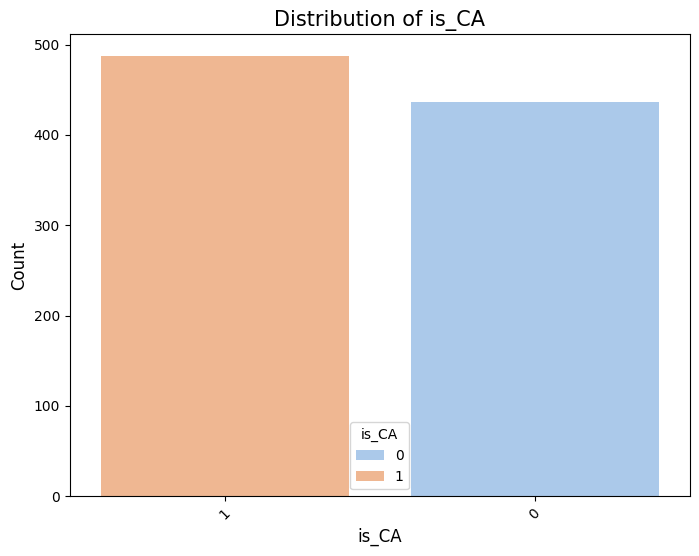

Frequency Distribution of is_CA:
is_CA
1    0.527627
0    0.472373
Name: proportion, dtype: float64

Analysis for Categorical Column: is_NY


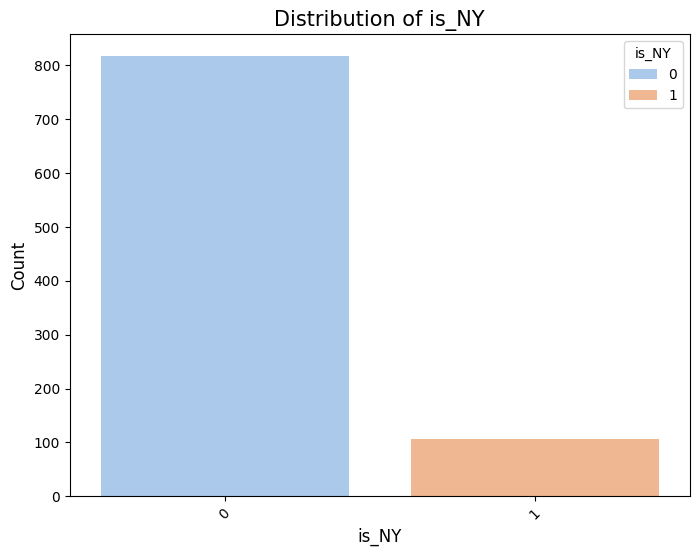

Frequency Distribution of is_NY:
is_NY
0    0.885157
1    0.114843
Name: proportion, dtype: float64

Analysis for Categorical Column: is_MA


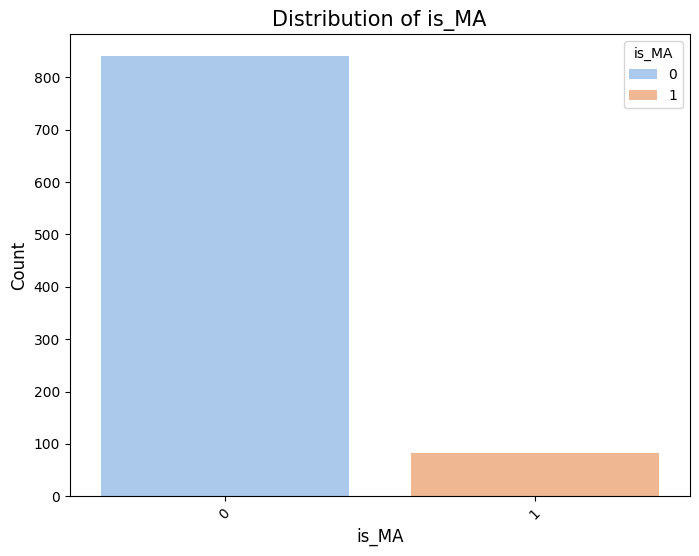

Frequency Distribution of is_MA:
is_MA
0    0.910076
1    0.089924
Name: proportion, dtype: float64

Analysis for Categorical Column: is_TX


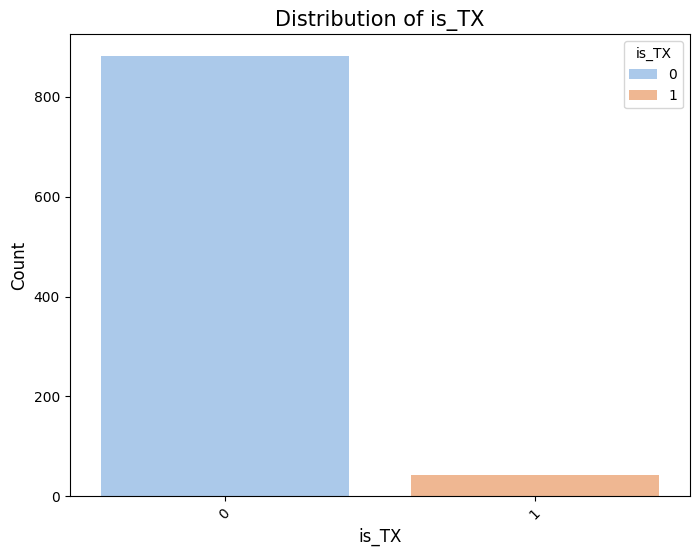

Frequency Distribution of is_TX:
is_TX
0    0.954496
1    0.045504
Name: proportion, dtype: float64



In [ ]:
for col in categorical_columns:
    analyze_categorical(col)

### Numerical Columns Analysys

Analysis for Numerical Column: age_first_funding_year


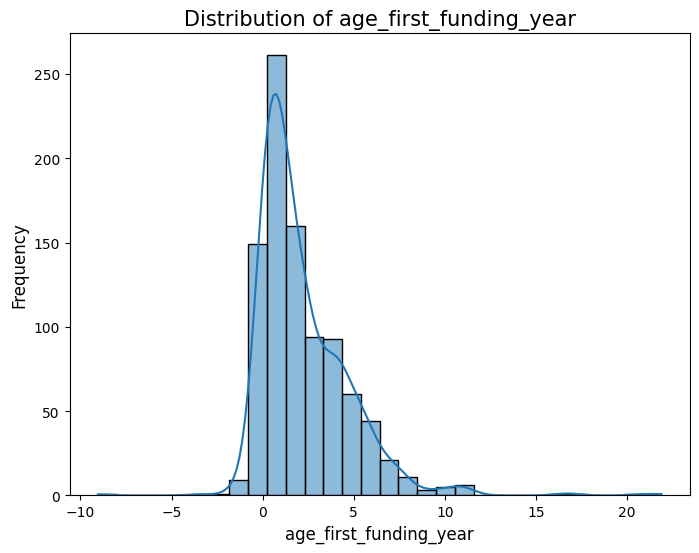

Statistics for age_first_funding_year:
Mean: 2.235630010834236, Standard Deviation: 2.5104485395130225
Skewness: 2.1005798811612877, Kurtosis: 9.999746122465806
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_last_funding_year


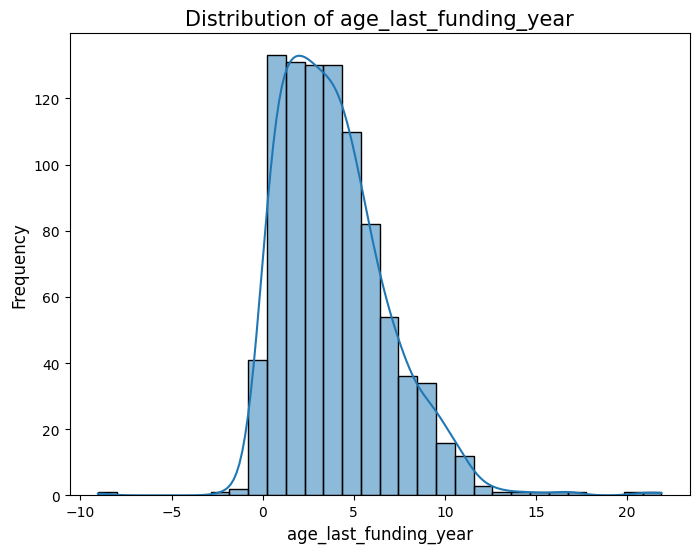

Statistics for age_last_funding_year:
Mean: 3.9314557963163597, Standard Deviation: 2.967909846607269
Skewness: 1.0902997848105946, Kurtosis: 3.132130645440287
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_first_milestone_year


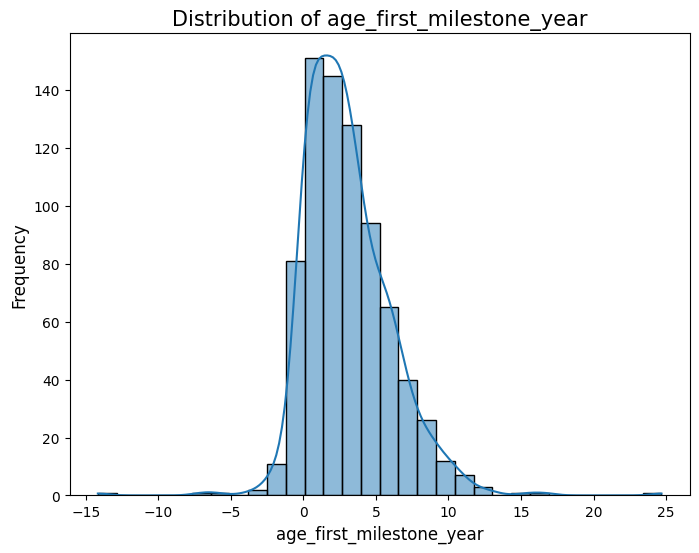

Statistics for age_first_milestone_year:
Mean: 3.055353047989624, Standard Deviation: 2.9770571428977264
Skewness: 0.9426291866430279, Kurtosis: 5.595027875292853
Interpretation:
- Skewness: Approximately symmetric
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: age_last_milestone_year


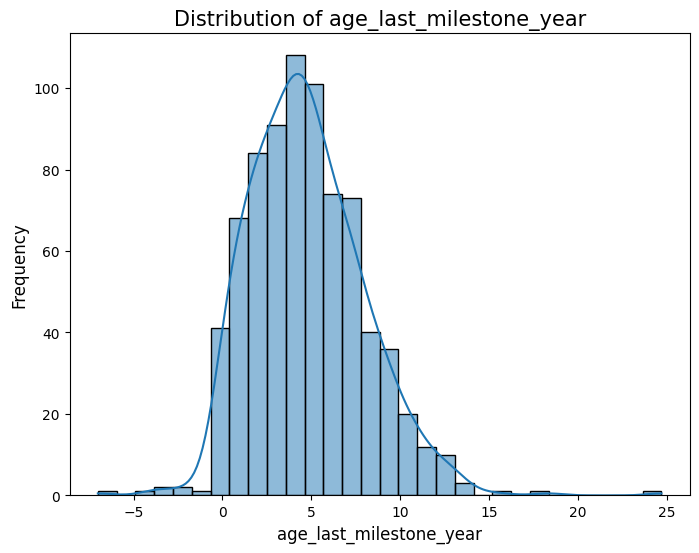

Statistics for age_last_milestone_year:
Mean: 4.754422568093385, Standard Deviation: 3.21210715620923
Skewness: 0.710547953398705, Kurtosis: 2.0589643752416826
Interpretation:
- Skewness: Approximately symmetric
- Kurtosis: Platykurtic (light tails)

Analysis for Numerical Column: relationships


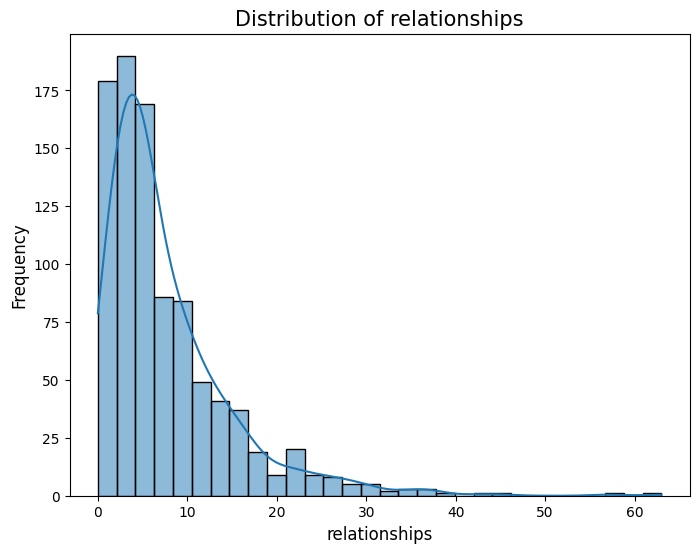

Statistics for relationships:
Mean: 7.710725893824486, Standard Deviation: 7.265776000021263
Skewness: 2.326173012299661, Kurtosis: 8.580884180147281
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: funding_rounds


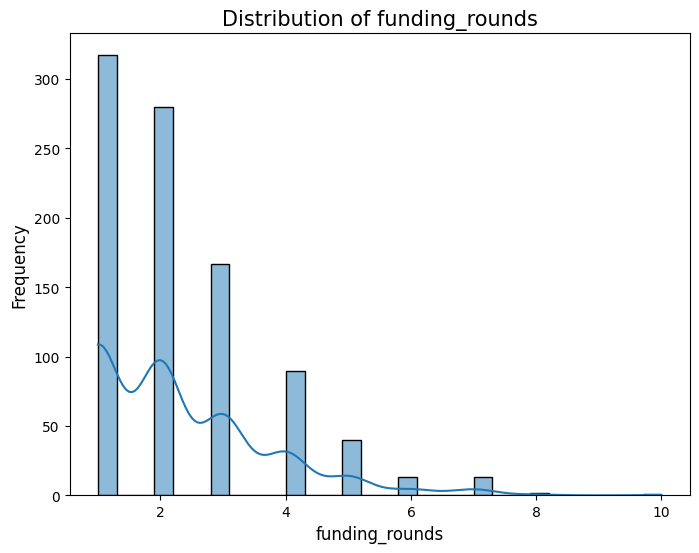

Statistics for funding_rounds:
Mean: 2.3109425785482123, Standard Deviation: 1.3909217125220052
Skewness: 1.3547108901113336, Kurtosis: 2.245763863776274
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Platykurtic (light tails)

Analysis for Numerical Column: funding_total_usd


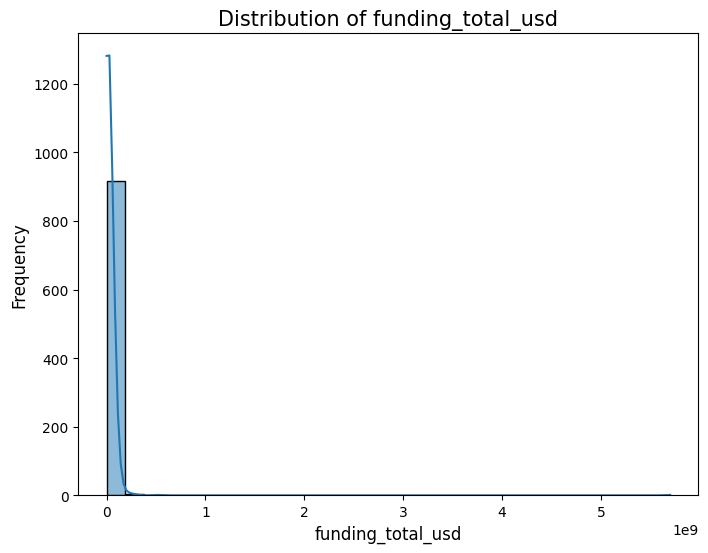

Statistics for funding_total_usd:
Mean: 25419749.09209101, Standard Deviation: 189634364.4887944
Skewness: 29.1050624735019, Kurtosis: 867.6329162424414
Interpretation:
- Skewness: Highly skewed to the right
- Kurtosis: Leptokurtic (heavy tails)

Analysis for Numerical Column: milestones


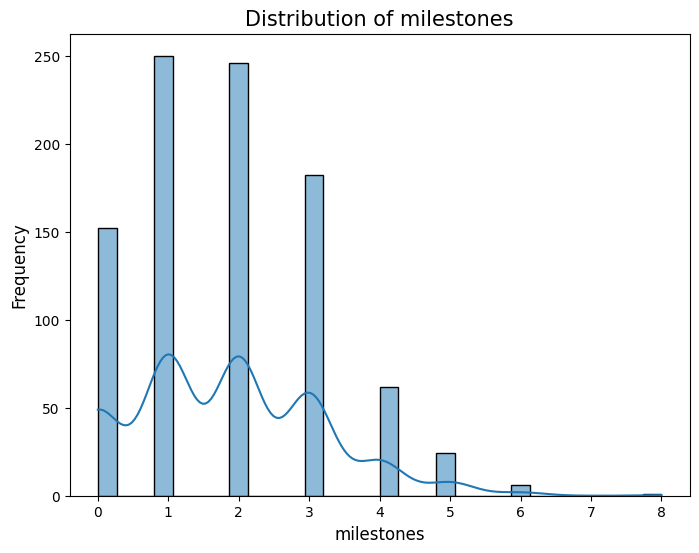

Statistics for milestones:
Mean: 1.8418201516793067, Standard Deviation: 1.322632023165972
Skewness: 0.5764393225408646, Kurtosis: 0.2524248523934771
Interpretation:
- Skewness: Approximately symmetric
- Kurtosis: Platykurtic (light tails)



In [ ]:
for col in numerical_columns:
    analyze_numerical(col)

### Date Columns Analysys

Analysis for Date Column: founded_at


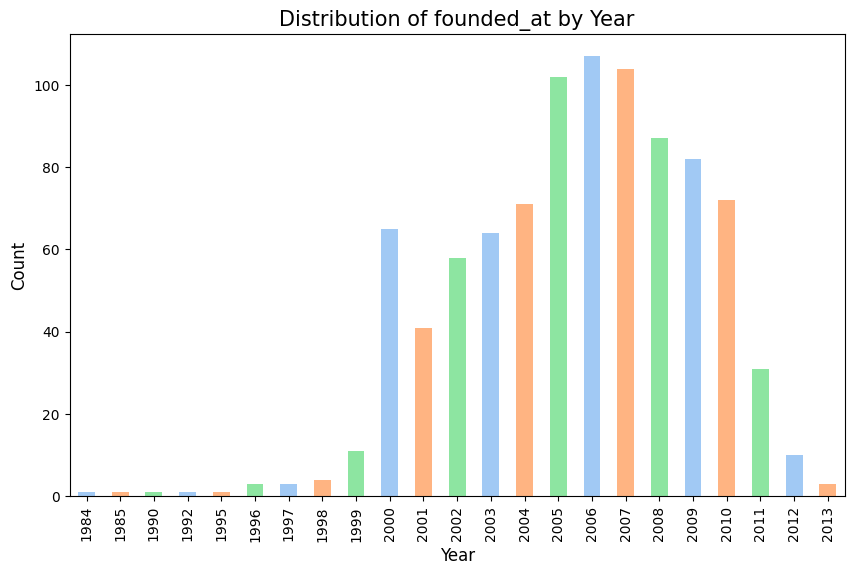

Frequency Distribution of founded_at by Year:
founded_at
1984      1
1985      1
1990      1
1992      1
1995      1
1996      3
1997      3
1998      4
1999     11
2000     65
2001     41
2002     58
2003     64
2004     71
2005    102
2006    107
2007    104
2008     87
2009     82
2010     72
2011     31
2012     10
2013      3
Name: count, dtype: int64

Analysis for Date Column: closed_at


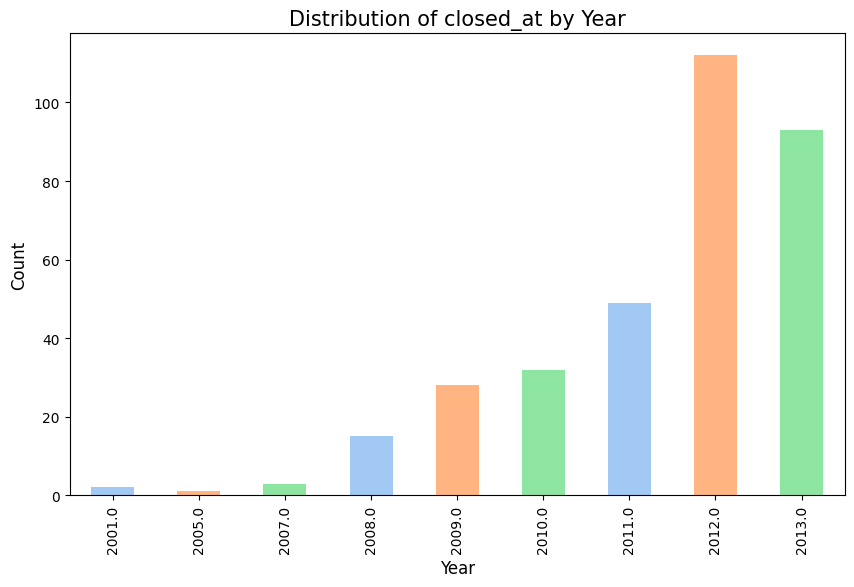

Frequency Distribution of closed_at by Year:
closed_at
2001.0      2
2005.0      1
2007.0      3
2008.0     15
2009.0     28
2010.0     32
2011.0     49
2012.0    112
2013.0     93
Name: count, dtype: int64

Analysis for Date Column: first_funding_at


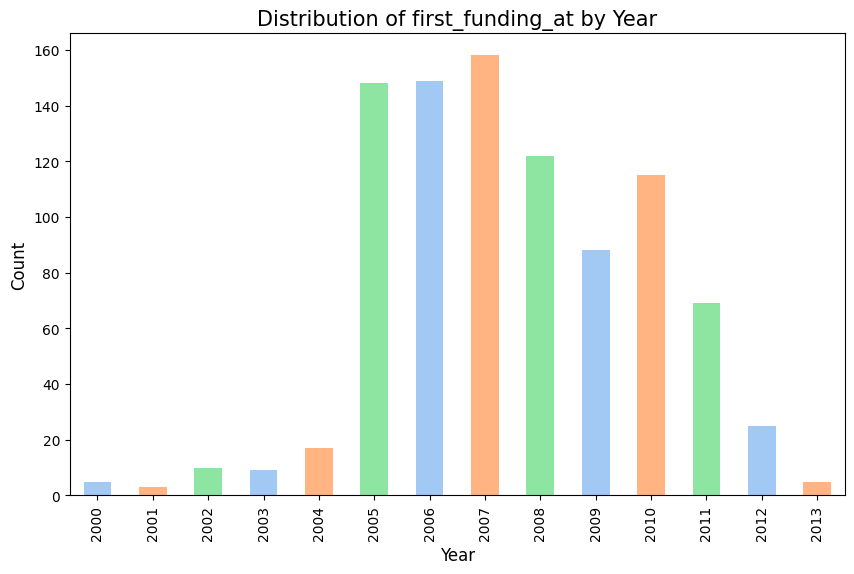

Frequency Distribution of first_funding_at by Year:
first_funding_at
2000      5
2001      3
2002     10
2003      9
2004     17
2005    148
2006    149
2007    158
2008    122
2009     88
2010    115
2011     69
2012     25
2013      5
Name: count, dtype: int64

Analysis for Date Column: last_funding_at


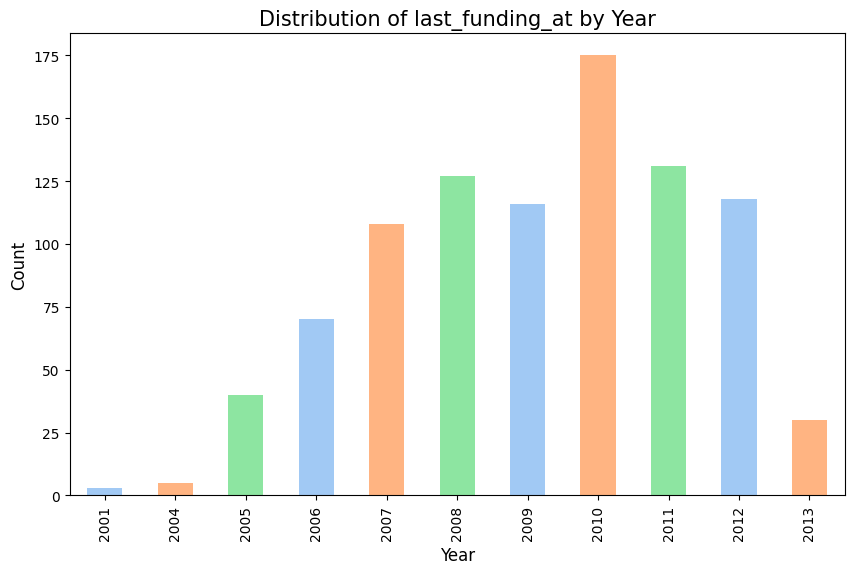

Frequency Distribution of last_funding_at by Year:
last_funding_at
2001      3
2004      5
2005     40
2006     70
2007    108
2008    127
2009    116
2010    175
2011    131
2012    118
2013     30
Name: count, dtype: int64



In [ ]:
for col in date_columns:
    analyze_date(col)


# Multivariate data analysis

In this section, you should plot at least **5 multivariate visualizations**. The key here is to investigate underlying correlations and behaviors within the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **ONE** non-obvious behavior in the data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. Explain why you have selected these specific variables and what you expect to discover through their relationship;
2. Determine what kind of visualization is the most suitable;
3. Report the findings and discuss whether they corroborate or not the aforementioned hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For example, consider applying techniques such as PCA, t-SNE, or even others that we haven't covered in the lectures. The goal is to cultivate a critical mindset toward data analysis and our work.

### Important

It is strictly prohibited to create multivariate visualizations using variables that were not included in the previous section (univariate data analysis).

##Hypothesis 1:

* Question:
Is there any correlation betweeen the funding total amount a startup has received and its business activity? Are tech companies privileged?
* Choosen variables:
is_tech_company (categorical) vs funding_total_usd (numerical)
* Expect do discover:
Did technolgy companies receive more funding (U$)? Are their mean funding bigger than other business categories?
* Kind of visualization:
We ploted two differents bar-plots: one is about 'Funding Distribution Ranges by Tech vs Non-Tech Startups' and the other is about the "Average Investment by Company Type (Tech vs Non-Tech)"
* Report findings:
Tech companies had a bigger mean funding than other commpanies. The funding distribution plot didn't corroborate, but the one about average investment did



<ipython-input-74-a5c95ed6b2f6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funding_range_by_tech = df.groupby(['is_technology', 'funding_range']).size().reset_index(name='count')


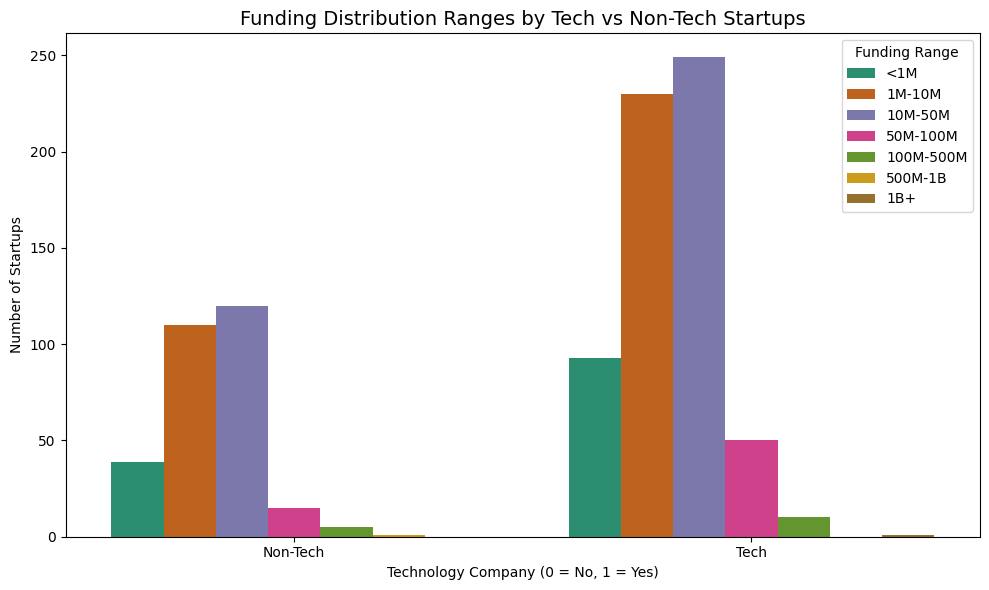

In [ ]:
# Contagem de startups por faixa de funding e tipo de empresa (TI ou não)
bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8, 1e9, df['funding_total_usd'].max()]
labels = ['<1M', '1M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-1B', '1B+']

#New column with the range funding
df['funding_range'] = pd.cut(df['funding_total_usd'], bins=bins, labels=labels)
funding_range_by_tech = df.groupby(['is_technology', 'funding_range']).size().reset_index(name='count')


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=funding_range_by_tech, x='is_technology', y='count', hue='funding_range', palette='Dark2')
plt.title('Funding Distribution Ranges by Tech vs Non-Tech Startups', fontsize=14)
plt.xlabel('Technology Company (0 = No, 1 = Yes)')
plt.ylabel('Number of Startups')
plt.xticks([0, 1], ['Non-Tech', 'Tech'])
plt.legend(title='Funding Range')
plt.tight_layout()
plt.show()

<ipython-input-75-c18834fa4297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_technology', y='funding_total_usd', estimator='mean', palette=['#FF6F61', '#6B5B95'])


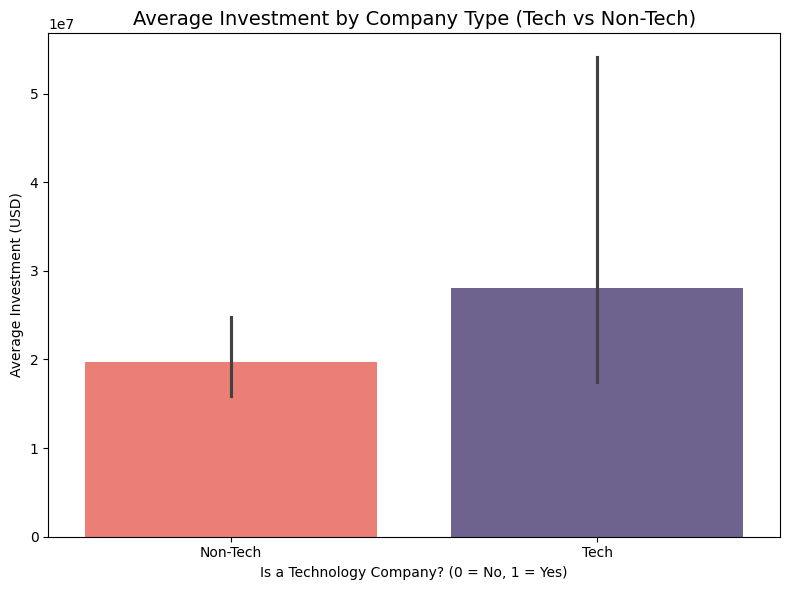

In [ ]:
# Create a bar plot showing the average investment by company type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='is_technology', y='funding_total_usd', estimator='mean', palette=['#FF6F61', '#6B5B95'])

# Adjust labels
plt.title('Average Investment by Company Type (Tech vs Non-Tech)', fontsize=14)
plt.xlabel('Is a Technology Company? (0 = No, 1 = Yes)')
plt.ylabel('Average Investment (USD)')
plt.xticks([0, 1], ['Non-Tech', 'Tech'])

plt.tight_layout()
plt.show()


##Hypothesis 2:
* Question: Are companies that achieve the first milestone earlier more successfull?
* Choosen variables: age_first_milestone (numerical) x status(categorical)
* Expecta do discover: if a company devoleped very fast, achieving the first milestone early, is that a good thing or bad? Does those companies fail as often as they succeed?
* Kind of visualization: boxplot, because we wanna compare the distribution of a numerical variable across different categories and the metrics (outliers and mean for example)
* Report findings: achieving the first milestone at a young age and having success are not correlated, because the mean are just the same, we also have some outlires that achieving the first milestone after 15 years and were acquired, so these variables arent correlated

<ipython-input-76-019ccc7ba1b0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='status', y='age_first_milestone_year', palette='Set2')


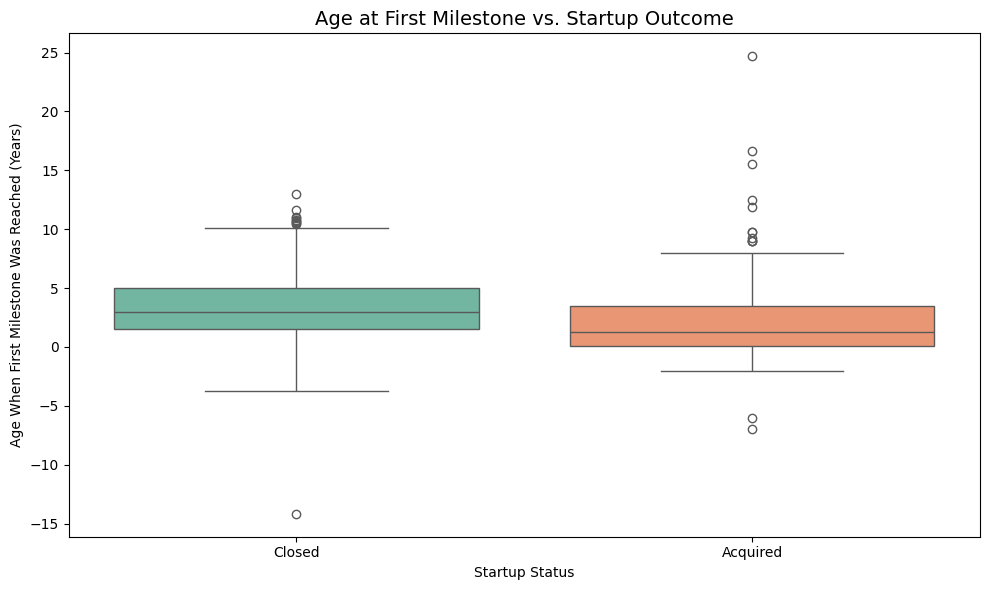

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='age_first_milestone_year', palette='Set2')

plt.title('Age at First Milestone vs. Startup Outcome', fontsize=14)
plt.xlabel('Startup Status')
plt.ylabel('Age When First Milestone Was Reached (Years)')
plt.xticks([0, 1], ['Closed', 'Acquired'])  # Ajuste conforme suas categorias reais

plt.tight_layout()
plt.show()


##Hypothesis 3:
* Question: there is any relation between the startup founding/shutdowns and economy crisis? Did it affect technology companies?
* Context: The Dotcom Bubble (2000) led to a sharp decline in internet-based startups due to overvaluation and lack of profitability. Later, the Global Financial Crisis (2008) caused a severe contraction in funding and investment, affecting startups across all sectors. More recently, the COVID-19 pandemic (2020) introduced unprecedented uncertainty, disrupting operations and shifting market dynamics, leading to both new opportunities and widespread closures.
* Choosen variables:closed_at vs founded_at. The second chart has a 'is_technology' column filter
* Expecta do discover: the global crisis affected the tech companies, specially the technology ones
* Kind of visualization: sobreposed histrograms
* Report findings: the global crisis didn't impprove the startups shutdowns, but we saw that the 2008 crisis closed more startup than the other crisis and the highest startup closure rate occured in the years following that crisis. The same happenned with tech startups

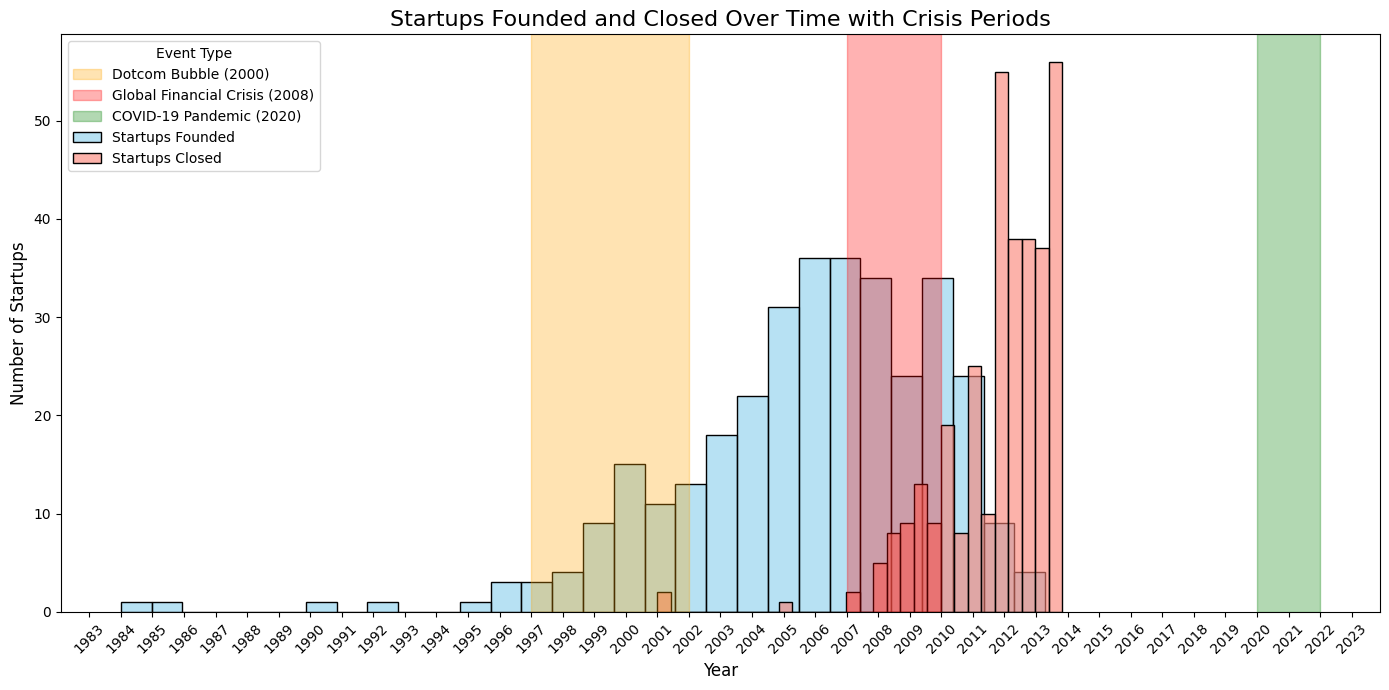

In [ ]:
# Plot
plt.figure(figsize=(14, 7))
sns.histplot(df['founded_at'], kde=False, color='skyblue', label='Startups Founded', bins=30, alpha=0.6)
sns.histplot(df['closed_at'], kde=False, color='salmon', label='Startups Closed', bins=30, alpha=0.6)

# Add crisis periods as shaded regions or vertical lines
# Dotcom Bubble (2000): 1997-2001
plt.axvspan(pd.Timestamp('1997-01-01'), pd.Timestamp('2001-12-31'), color='orange', alpha=0.3, label='Dotcom Bubble (2000)')

# Global Financial Crisis (2008): 2007-2009
plt.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2009-12-31'), color='red', alpha=0.3, label='Global Financial Crisis (2008)')

# COVID-19 Pandemic (2020): 2020-2021
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='green', alpha=0.3, label='COVID-19 Pandemic (2020)')

# Add labels and legend
plt.title('Startups Founded and Closed Over Time with Crisis Periods', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.legend(title='Event Type')

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


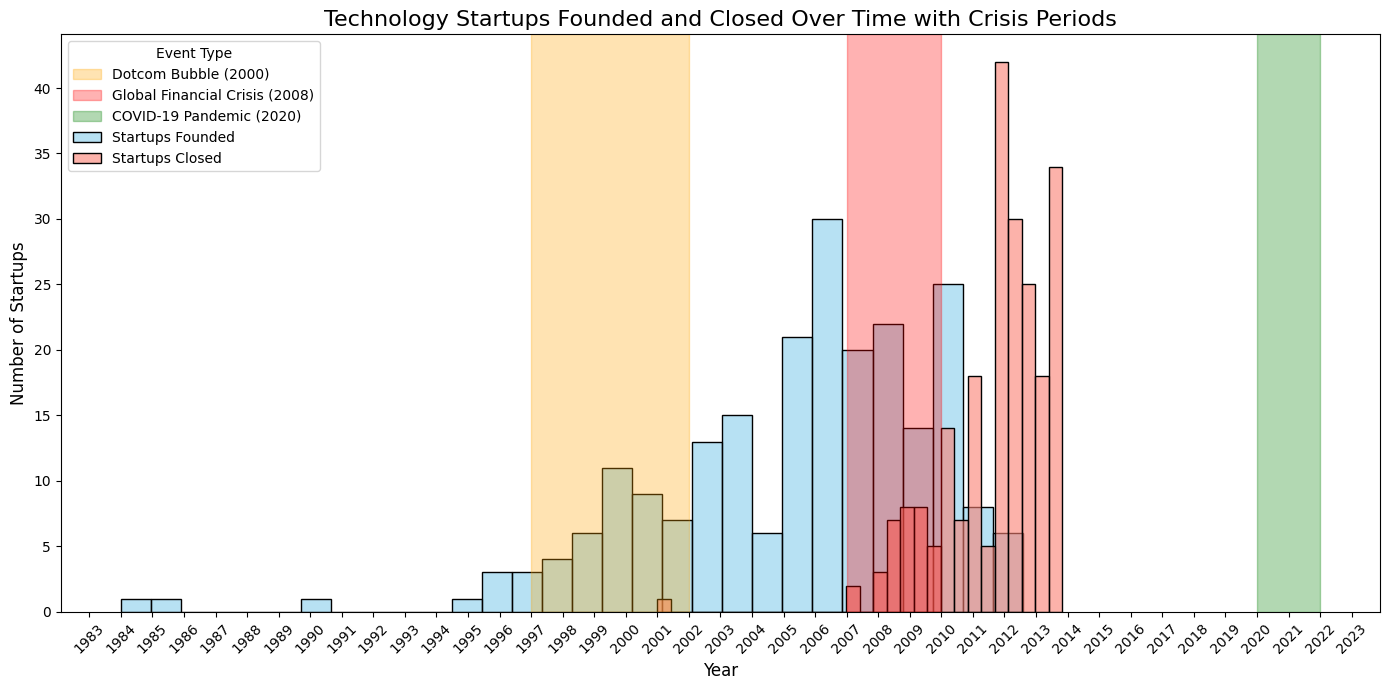

In [ ]:
# Plot
plt.figure(figsize=(14, 7))
df_tech_closure = df[df['is_technology'] == 1]
sns.histplot(df_tech_closure['founded_at'], kde=False, color='skyblue', label='Startups Founded', bins=30, alpha=0.6)
sns.histplot(df_tech_closure['closed_at'], kde=False, color='salmon', label='Startups Closed', bins=30, alpha=0.6)

# Add crisis periods as shaded regions or vertical lines
# Dotcom Bubble (2000): 1997-2001
plt.axvspan(pd.Timestamp('1997-01-01'), pd.Timestamp('2001-12-31'), color='orange', alpha=0.3, label='Dotcom Bubble (2000)')

# Global Financial Crisis (2008): 2007-2009
plt.axvspan(pd.Timestamp('2007-01-01'), pd.Timestamp('2009-12-31'), color='red', alpha=0.3, label='Global Financial Crisis (2008)')

# COVID-19 Pandemic (2020): 2020-2021
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), color='green', alpha=0.3, label='COVID-19 Pandemic (2020)')

# Add labels and legend
plt.title('Technology Startups Founded and Closed Over Time with Crisis Periods', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Startups', fontsize=12)
plt.legend(title='Event Type')

# Format x-axis to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Hypothesis 4:
* Question: Is there a correlation between the year of the last funding round and the year the startup closed? If the startup stops receiving funding, it closures?
* Choosen variables: last_funding_at (date) × closed_at (date)
* Expecta do discover: Startups tend to fail shortly after they stop receiving investments.
* Kind of visualization: Scatter plot to observe proximity between last funding year and closing year.
* Report findings: The points are very away from the diagonal, so there isn't correlation,


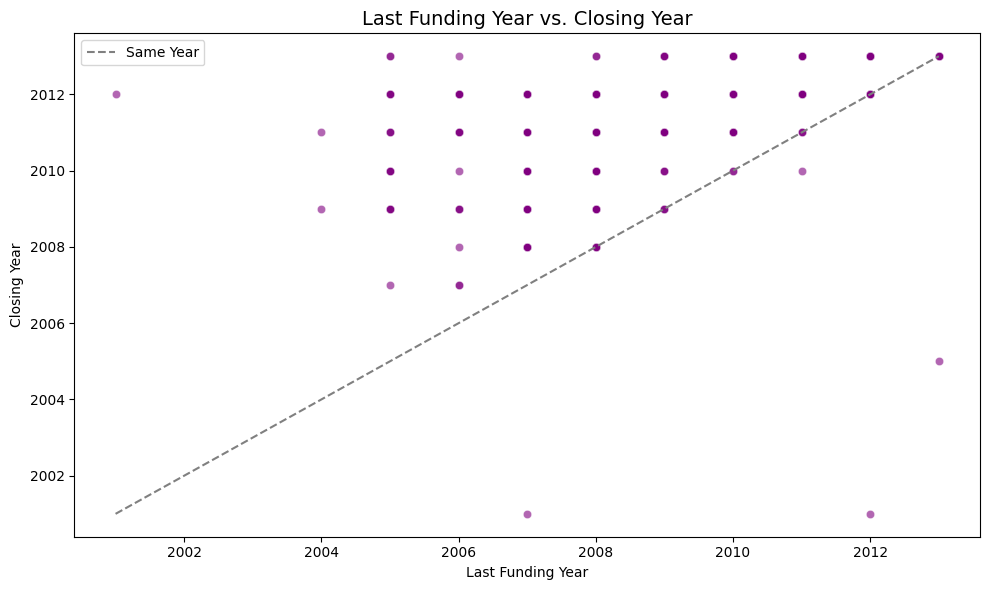

In [ ]:
# Preparar os dados
df_plot = df[['last_funding_at', 'closed_at']].dropna().copy()
df_plot['last_funding_year'] = df_plot['last_funding_at'].dt.year
df_plot['closing_year'] = df_plot['closed_at'].dt.year

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='last_funding_year', y='closing_year', alpha=0.6, color='purple')

# Linha de referência
plt.plot([df_plot['last_funding_year'].min(), df_plot['last_funding_year'].max()],
         [df_plot['last_funding_year'].min(), df_plot['last_funding_year'].max()],
         linestyle='--', color='gray', label='Same Year')

plt.title('Last Funding Year vs. Closing Year', fontsize=14)
plt.xlabel('Last Funding Year')
plt.ylabel('Closing Year')
plt.legend()
plt.tight_layout()
plt.show()



##Hypothesis 5:
* Question: Does receiving funding earlier in a startup’s life relate to longevity?
* Choosen variables: age_first_funding_year (numerical) × age_last_milestone_year (numerical, used as proxy for age at closing)
* Expecta do discover: Startups that receive their first investment later in their life may have shorter lifespans, or fail faster.
* Kind of visualization: Scatter plot to observe the relationship between age at first funding and age at closing.
* Report findings: There isn't correlation


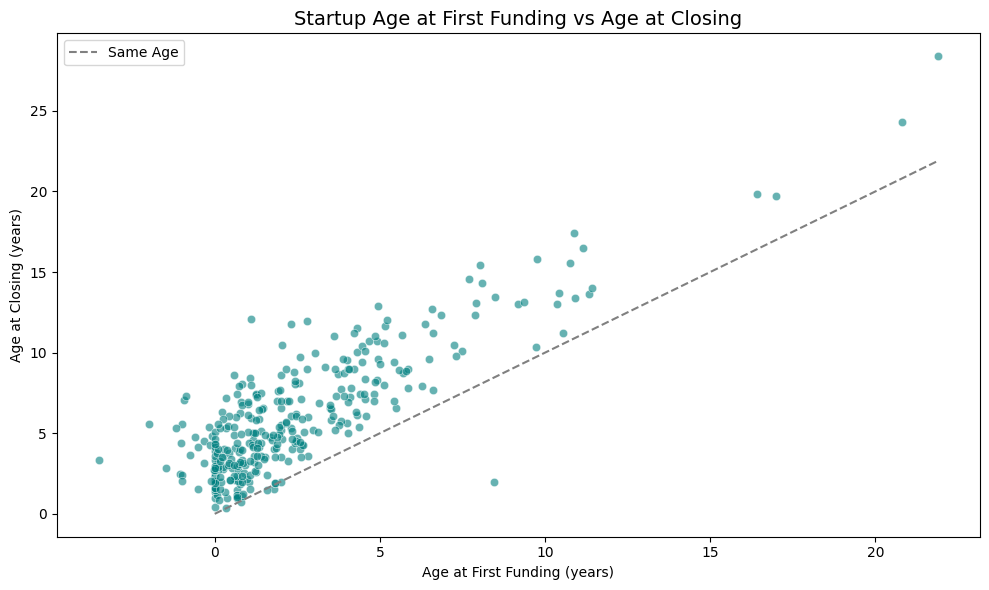

In [ ]:
# Calcular idade ao fechar
df_age = df[['age_at_closing', 'age_first_funding_year']].dropna().copy()

# Remover casos inconsistentes
df_age = df_age[df_age['age_at_closing'] > 0]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_age, x='age_first_funding_year', y='age_at_closing', alpha=0.6, color='teal')

# Linha de referência (se desejar)
plt.plot([0, df_age['age_first_funding_year'].max()],
         [0, df_age['age_first_funding_year'].max()],
         linestyle='--', color='gray', label='Same Age')

plt.title('Startup Age at First Funding vs Age at Closing', fontsize=14)
plt.xlabel('Age at First Funding (years)')
plt.ylabel('Age at Closing (years)')
plt.legend()
plt.tight_layout()
plt.show()


# Final Plots (Effective Data Visualization)

In this section, you need to **enhance 3 multivariate visualizations** that were presented in the previous section of the report.
The goal is to enhance these visualizations so that they can be effectively presented to an audience unfamiliar with the dataset or with data analysis.
**Therefore, make sure that their size, colors, textures, and other visual elements are appropriate and convey the intended information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot;
2. Provide a description of the visualization, highlighting the key findings that can be drawn from it.


**Hint**: take a look at the checklist based on Evergreen’s work to ensure your visualizations meet the best practices for clarity and impact.

## First final plot
The enhanced visualization, featuring overlaid histograms, illustrates the temporal distribution of startup foundings and shutdowns—both in general and specifically for technology startups—in relation to major economic crises. Most startups were founded between 2000 and 2013, with a notable spike in shutdowns occurring between 2011 and 2013, particularly following the 2008 financial crisis, indicating a delayed impact. In contrast, the Dotcom Bubble (2000) did not show a clear influence on closure rates within the dataset. The Covid Crisis (20220) also didn't affect the startups because we only have data until 2013. These patterns were also observed among tech startups, suggesting that even this sector, often seen as more resilient, was affected in the years after 2008. Overall, the analysis indicates that among the crises considered, only the 2008 recession had a significant and measurable effect on startup shutdowns, including those in the technology sector.

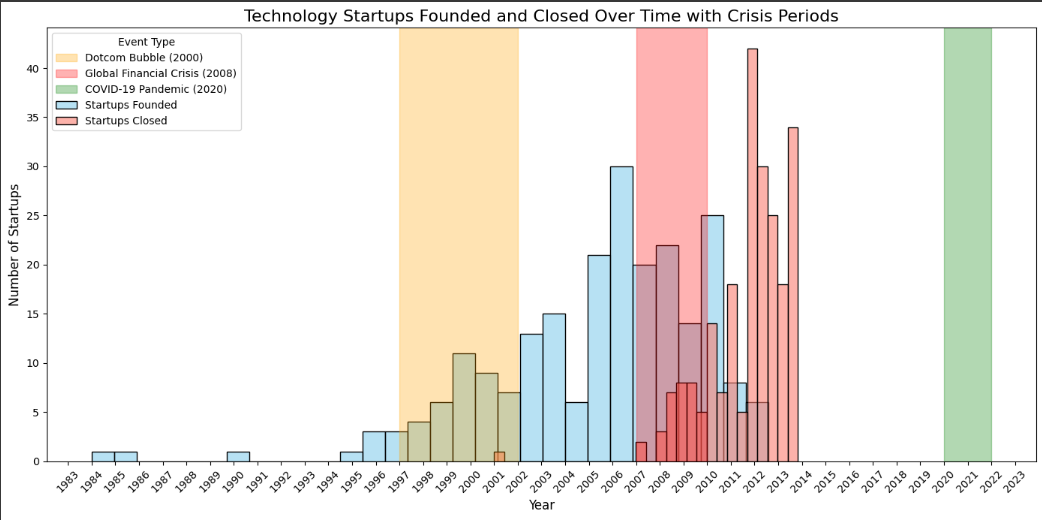

## Second final plot
To evaluate whether achieving the first milestone at a younger company age is associated with greater success, we compared the distribution of the variable age at first milestone across two outcome categories: acquired and closed. A boxplot was used to visualize this relationship, as it effectively highlights distribution, central tendency, and outliers across categorical groups. The results indicate that there is no clear correlation between the timing of the first milestone and the final status of the startup. Both acquired and closed companies shared a similar mean and spread, and notably, some startups that achieved their first milestone after more than 15 years were still acquired. This suggests that reaching early milestones does not necessarily predict success, and that other factors likely play a more significant role in determining a startup’s long-term outcome.
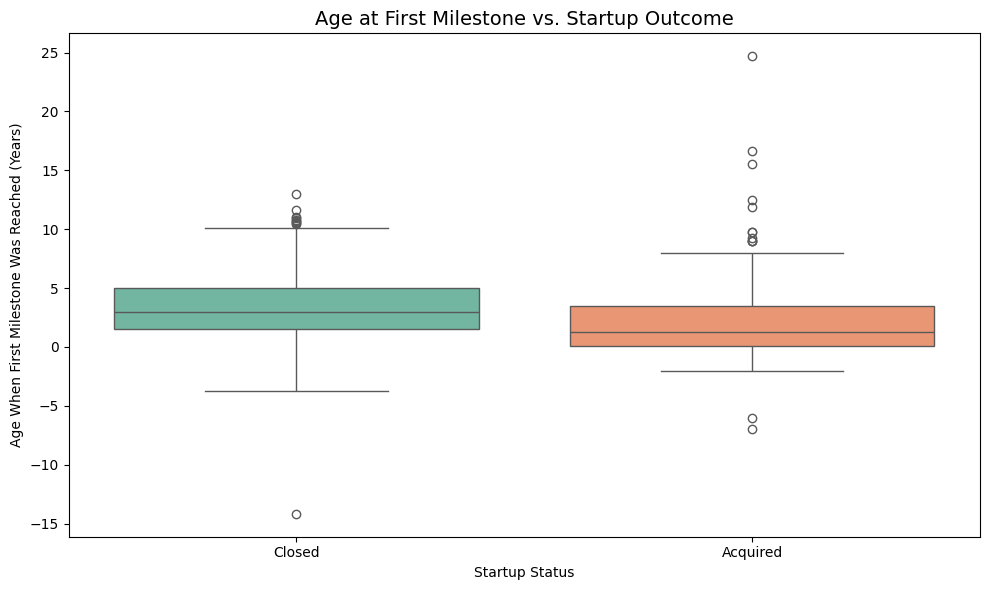









## Third final  plot

To investigate whether technology companies receive more funding than non-tech startups, we analyzed the relationship between company type (tech vs. non-tech) and total funding received (in USD). The analysis showed that tech startups tend to receive higher average funding compared to their non-tech counterparts. This indicates that technology companies are generally more privileged in terms of investment, potentially due to their scalability, innovation-driven models, and the strong interest they attract from investors. Overall, the results support the hypothesis that being a tech company is associated with greater access to financial resources.

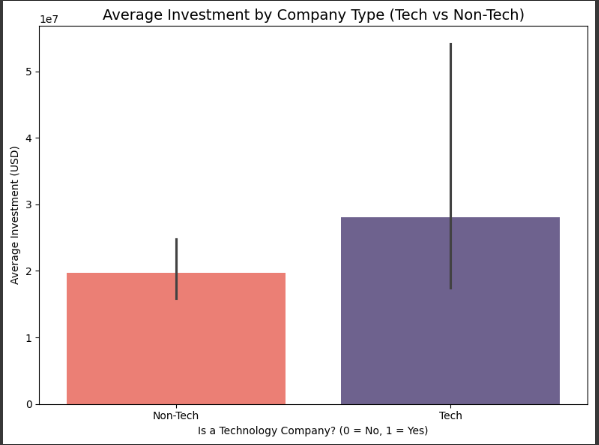

# Digest

In this section you should write down the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2,500 characters (excluding spaces).

#Main Findings of the Exploratory Data Analysis

The dataset under analysis contains information about approximately 900 startups, most of which are located in California and belong to various industries subsectors, specially the technology-related one's. Specifically, around 600 of these companies fall into the tech category, showing a strong regional and sectoral concentration.

The dataset is labeled, with a target class named "status", which can be either acquired or closed. A significant majority of the startups—64.5%—were acquired, while the remaining 35.5% were closed. This suggests that, despite the high-risk nature of startups, a good portion of them reached successful exits.

We analyzed the impact of economic crises on the startups outcomes. Interestingly, most global economic events did not substantially affect these companies, with the exception of the 2008 financial crisis, which appears to have had some measurable impact.

Another key observation is that the majority of startups secured their first round of funding and achieved their first milestone within the first 0 to 5 years of their foundation. This pattern highlights the initial years as a critical period for startup growth and development.

Most of the startups in the dataset were founded between 2000 and 2013, with 2013 being the founding year of the most recent startup. In contrast, a large number of closures occurred between 2011 and 2013.

We also observed that technology startups received a higher average investment compared to those in other sectors, which is consistent with broader industry trends where tech ventures attract more investor interest and capital.

An important insight was related to the correlation—or the lack thereof—between achieving the first milestone early and long-term success. The data shows that reaching a first milestone at a young age is not necessarily associated with a successful outcome, as both acquired and closed startups had similar mean milestone achievement ages. Additionally, some outliers had achieved their first milestone more than 15 years after being founded and were still acquired, further suggesting no strong correlation between these variables.

Similarly, we found no clear correlation between the time of receiving the last investment and whether a startup closed or was acquired. This insight implies that not receiving further investment does not appear to be a decisive factor in a company shutting down.

#Personal Reflection on the Work and Process

Working on this analysis was an engaging experience. It was interesting to uncover patterns and stories behind the data, especially around startup life cycles and investment behavior.

However, I also recognize that the process took longer than necessary, possibly due to over-focusing on some aspects while leaving others underexplored. In hindsight, we could have allocated our time more efficiently.

Additionally, while we did notice the presence of a few outliers, we opted not to treat them, considering their limited number. Looking back, I believe a more thorough treatment of outliers could have enriched our analysis and made our insights a little more robust.

Despite these limitations, we were satisfied with the overall quality of our work and the learning experience it provided. It helped us strengthen our data analysis and critical thinking skills, and now we feel more confident about approaching similar projects in the future and building a good data pipeline.


# Machine Learning (**post checkpoint!**)

In this section, you must create at least **3 machine learning models** for the task at hand. Depending on the problem's nature, you must select from classification, regression, or clustering models.
It is also important that you:
* Select **an appropriate validation protocol**, providing a rationale for why it is appropriate for this specific task;
* Choose **a suitable set of evaluation metrics**, providing an explanation for each and describing how it contributes to evaluating the model's performance in the context of this specific task.

In [ ]:
# use as many cells as needed

# Final Steps (Submission)


1. Save this report as a Jupyter Notebook (`.ipynb`);
2. Export a copy of the report as a PDF file (`.pdf`);
3. Copy the dataset;
4. Compress all the files (the Jupyter Notebook, PDF, and dataset) into a single ZIP archive (`<your_team_name>.zip`);
5. Upload the ZIP file to AVA.

In [ ]:
#tentei mas nao deu boa
print("Before data transformation: ")
print(df.dtypes)

# we have a lot of columns that have 'object' type, so we need to transform them

date_columns = ['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at']
string_columns = ['state_code', 'zip_code', 'id', 'city', 'name', 'category_code', 'object_id', 'status']
numeric_columns = ['object_id']

# convert each column type
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')
df[string_columns] = df[string_columns].astype(str)
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# verify if the process was succesful
print("\n \n After data transformation:  \n")
print(df.dtypes)


Before data transformation: 
state_code                          object
latitude                           float64
longitude                          float64
zip_code                            object
id                                  object
city                                object
name                                object
labels                               int64
founded_at                  datetime64[ns]
closed_at                   datetime64[ns]
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
state_code.1                        object
is_CA                                int64
is_NY                    